# __`K Nearest Neighbor Classifier`__

In [192]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [193]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 1000, n_features = 3, n_classes = 2, n_redundant = 1, random_state = 999)

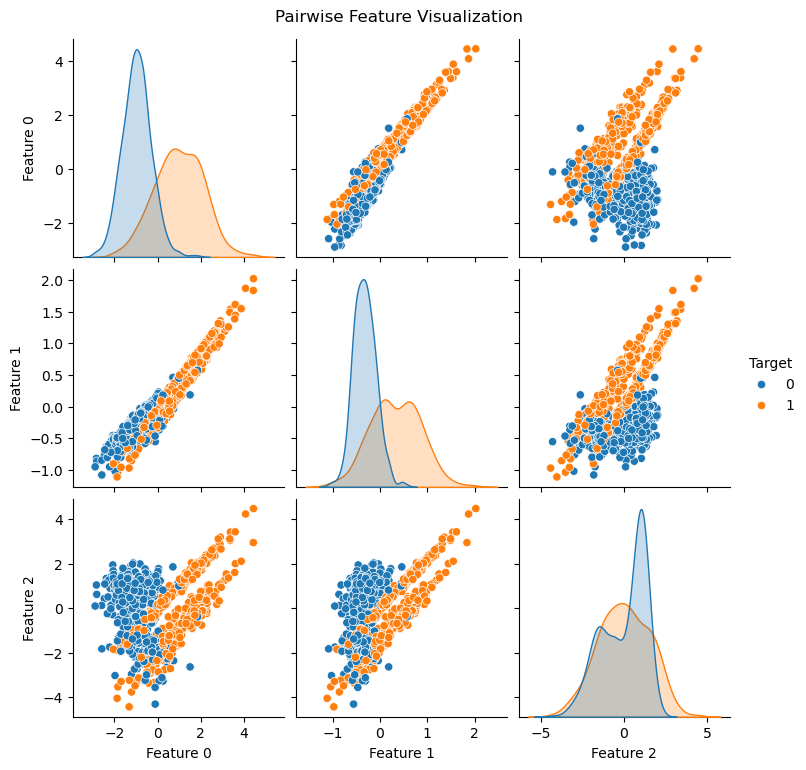

In [194]:
import pandas as pd

df = pd.DataFrame(X, columns=["Feature 0", "Feature 1", "Feature 2"])
df["Target"] = y

sns.pairplot(df, hue="Target")
plt.suptitle("Pairwise Feature Visualization", y=1.02)
plt.show()


In [195]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state  = 42)

X_train.shape, X_test.shape

((750, 3), (250, 3))

In [196]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [197]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0])

In [198]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Accuracy Score is {accuracy_score(y_test, y_pred)*100:.2f}\n')
print(f'Confusion Matric is : \n{confusion_matrix(y_test, y_pred)}\n')
print(f'Classfication Report is : \n{classification_report(y_test, y_pred)}\n')

Accuracy Score is 91.60

Confusion Matric is : 
[[120   6]
 [ 15 109]]

Classfication Report is : 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       126
           1       0.95      0.88      0.91       124

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250




## __`HyperParameter Tuning`__

In [199]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

neighbor = [3, 4, 5, 6, 7, 8, 9, 10]
w = ['uniform', 'distance']
leafSize = [5, 10, 15, 20]
p = [1, 2]
algo = ['ball_tree', 'kd_tree', 'brute'] 

cv = StratifiedKFold(n_splits=15, shuffle = True, random_state = 42)

params = dict(n_neighbors = neighbor, weights = w, leaf_size = leafSize, p = p, algorithm = algo)
params

{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
 'weights': ['uniform', 'distance'],
 'leaf_size': [5, 10, 15, 20],
 'p': [1, 2],
 'algorithm': ['ball_tree', 'kd_tree', 'brute']}

In [200]:
grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, verbose = 3, n_jobs = -1, scoring = 'accuracy', cv = cv)

grid.fit(X_train, y_train)

Fitting 15 folds for each of 384 candidates, totalling 5760 fits


c:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15, 20],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [201]:
grid.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 5,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'uniform'}

In [202]:
y_pred = grid.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0])

In [203]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Accuracy Score is {accuracy_score(y_test, y_pred)*100:.2f}\n')
print(f'Confusion Matric is : \n{confusion_matrix(y_test, y_pred)}\n')
print(f'Classfication Report is : \n{classification_report(y_test, y_pred)}\n')

Accuracy Score is 91.20

Confusion Matric is : 
[[119   7]
 [ 15 109]]

Classfication Report is : 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       126
           1       0.94      0.88      0.91       124

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250


